# <b/> <font color='green'><center>Malarial Cell Detection using CNN</center></font>

## <b/> Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as k

from tqdm.notebook import tqdm

## <b/> Data Preprocessing

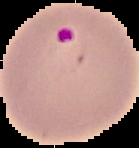

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
load_img('./Malarial Cell Image Data /cell_images/Parasitized/C33P1thinF_IMG_20150619_115808a_cell_206.png')

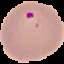

In [17]:
load_img('./Malarial Cell Image Data /cell_images/Parasitized/C33P1thinF_IMG_20150619_115808a_cell_206.png', target_size=(64,64))

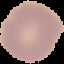

In [18]:
load_img('./Malarial Cell Image Data /cell_images/Uninfected/C1_thinF_IMG_20150604_105100_cell_130.png', target_size=(64,64))

In [19]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [20]:
image_dir = './Malarial Cell Image Data /cell_images/'
size = 64
dataset = []
label = []

In [26]:
parasitized_img = os.listdir(image_dir + 'Parasitized/')

for i, img_name in enumerate(tqdm(parasitized_img)):
    if (img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + 'Parasitized/' + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))

        dataset.append(np.array(image))
        label.append(0)

  0%|          | 0/13780 [00:00<?, ?it/s]

In [27]:
len(parasitized_img)

13780

In [28]:
uninfected_img = os.listdir(image_dir + 'Uninfected/')

for i, img_name in enumerate(tqdm(uninfected_img)):
    if (img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + 'Uninfected/' + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))

        dataset.append(np.array(image))
        label.append(1)

  0%|          | 0/13780 [00:00<?, ?it/s]

In [29]:
len(uninfected_img)

13780

## <b/> Splitting the Dataset

In [30]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [31]:
x_train, x_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=0)

## <b/> CNN Model

In [32]:
INPUT_SHAPE = (size, size ,3)

inp = k.Input(shape = INPUT_SHAPE)
conv1 = k.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = k.MaxPool2D(pool_size=(2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate=0.2)(norm1)

conv2 = k.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = k.MaxPool2D(pool_size=(2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate=0.2)(norm2)

conv3 = k.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop2)
pool3 = k.MaxPool2D(pool_size=(2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate=0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512, activation='relu')(flat)
norm4 = k.BatchNormalization(axis = -1)(hidden1)
drop4 = k.Dropout(rate=0.2)(norm4)

hidden2 = k.Dense(256, activation='relu')(drop4)
norm5 = k.BatchNormalization(axis = -1)(hidden2)
drop5 = k.Dropout(rate=0.2)(norm5)

out = k.Dense(2, activation='sigmoid')(drop5)

2024-08-20 20:54:34.320828: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-20 20:54:34.321133: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-20 20:54:34.321142: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-20 20:54:34.321218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-20 20:54:34.321314: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## <b/> Train the CNN Model

In [33]:
model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203,778 (4.59 MB)

 Trainable params: 1,202,050 (4.59 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [35]:
history = model.fit(np.array(x_train), y_train, batch_size=64,
                    verbose=1, epochs=10, validation_split=0.1,
                    shuffle=False)

Epoch 1/10


2024-08-20 21:01:05.441196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


621/621 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.7151 - loss: 0.6215 - val_accuracy: 0.8787 - val_loss: 0.3783
Epoch 2/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9300 - loss: 0.1901 - val_accuracy: 0.9261 - val_loss: 0.3271
Epoch 3/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.9108 - loss: 0.2252 - val_accuracy: 0.9197 - val_loss: 0.2436
Epoch 4/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9392 - loss: 0.1656 - val_accuracy: 0.9317 - val_loss: 0.2169
Epoch 5/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9358 - loss: 0.1688 - val_accuracy: 0.9515 - val_loss: 0.1566
Epoch 6/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.9541 - loss: 0.1304 - val_accuracy: 0.9576 - val_loss: 0.1185
Epoch 7/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9527 - loss: 0.1368 - val_accuracy: 0.9481 - val_loss: 0.1581
Epoch 8/10
621/621 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.9509 - loss: 0.1370 - val_accurac

In [36]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(x_test),np.array(y_test))[1]*100))

345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9630 - loss: 0.1136
Test accuracy: 96.39%


## <b/> Visualize the Model Accuracy

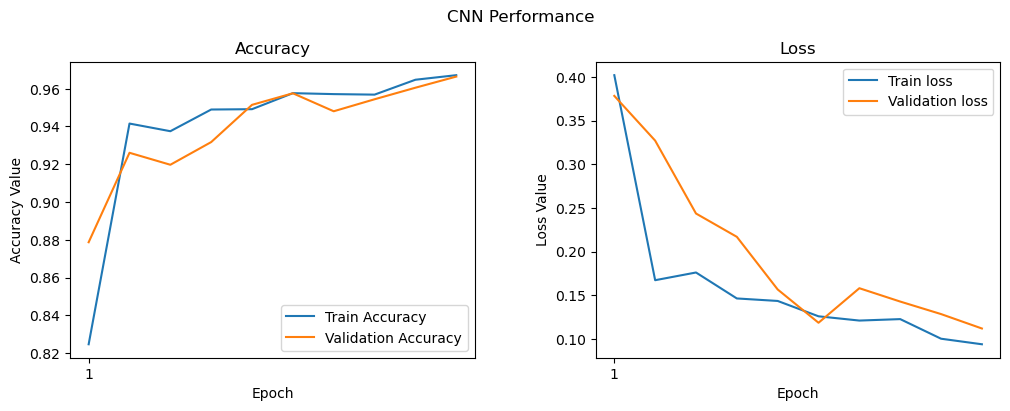

In [37]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

# 1st subplot for training accuracy
max_epoch = len(history.history['accuracy']) + 1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list,history.history['accuracy'],label='Train Accuracy')
ax1.plot(epoch_list,history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_xticks(np.arange(1,max_epoch,10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc='best')

# 2nd suplot for Validation loss
ax2.plot(epoch_list,history.history['loss'],label='Train loss')
ax2.plot(epoch_list,history.history['val_loss'],label='Validation loss')
ax2.set_xticks(np.arange(1,max_epoch,10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc='best')

## <b/> Saving the Model

In [38]:
model.save(r"/Users/Ankush/Desktop/Data Science/Malarial Cells Detection/malaria_cell_detection.h5")

In [39]:
model.save('malarial_model.keras')

------